### Question 1: Using the IRIS dataset do the NaiveBayes Modelling.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing iris dataset from sklearn
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# independent variables in iris dataset
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.target)
print("Dependent/Target variables of Iris dataset are:\n",iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Dependent/Target variables of Iris dataset are:
 ['setosa' 'versicolor' 'virginica']


In [6]:
# splitting the data
x=iris.data
y=iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
# split the data into training and testing data using sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [8]:
# Normalizing/Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)
print(xtrain.shape)
print(xtest.shape)

(112, 4)
(38, 4)


In [9]:
# Applying Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
# predicting the testing set
ypred=classifier.predict(xtest)

In [11]:
print(ypred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [15]:
# preparing the Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
conf_matrix=confusion_matrix(ytest,ypred)
print("Confusion matrix of iris data using Guassian Naive Bayes Classifier is:\n",conf_matrix)

Confusion matrix of iris data using Guassian Naive Bayes Classifier is:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


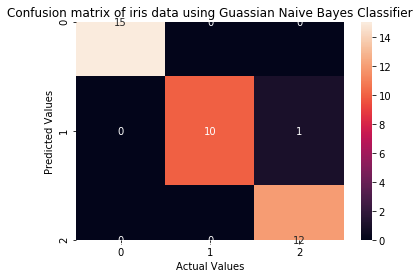

In [16]:
# plotting the confusion matrix
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix of iris data using Guassian Naive Bayes Classifier')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [17]:
# Calculating Accuracy Score
accuracy_iris_gnb=(accuracy_score(ytest,ypred)*100)
print("Accuracy score of iris data using Naive Bayes Gaussian model is:",accuracy_iris_gnb)

Accuracy score of iris data using Naive Bayes Gaussian model is: 97.36842105263158


### Accuracy of iris dataset from Naive Bayes Gaussian classifer is:97.36%

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,iris.data,iris.target,scoring='accuracy',cv=10).mean()

0.9533333333333334